In [1]:
from useful_scit.imps import (pd,np,xr,za,mpl,plt,sns, pjoin,
                               os,glob,dt,sys,ucp,log, splot)
import flexpart_management.modules.flx_array as fa
import flexpart_management.modules.constants as co
mpl.rcParams['figure.dpi'] = 100
# %matplotlib notebook

reload


In [2]:
dir_path = '/homeappl/home/aliagadi/wrk/DONOTREMOVE/flexpart_management_data/runs/run_2019-09-14_08-43-03_/2018-01-01'

In [3]:
DD = co.D2
nds = fa.euristic_import_flexpart(dir_path, DD)

In [4]:
_da = nds[co.CONC].squeeze()

(-16.550427, -16.150427)

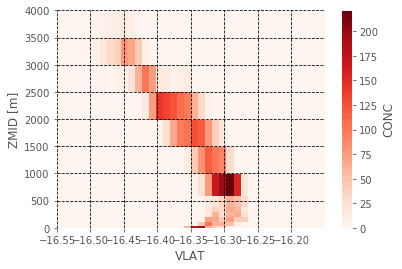

In [5]:
_da1 = _da.sum([co.TIME,co.VLONG]).loc[{co.ZM:slice(0,4e3)}]
f,ax = splot()
_da1.plot.pcolormesh(ax=ax,cmap=plt.get_cmap('Reds'));
ax.grid(True,color='k',linestyle='--')
ax.set_title('');
ax.set_axisbelow(False)
ax.set_xlim((co.CHC_LAT-.2,co.CHC_LAT+.2))

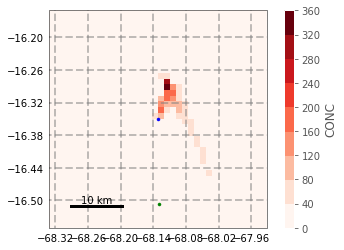

In [6]:
from cartopy import crs
_da1 = _da.sum([co.TIME,co.ZM])
f,ax = splot(subplot_kw={'projection':crs.PlateCarree()})
_da1.plot.pcolormesh(ax=ax,cmap=plt.get_cmap('Reds'),levels=10);

ax.set_title('');
ax.set_xlim((co.CHC_LON-.2,co.CHC_LON+.2))
ax.set_ylim((co.CHC_LAT-.2,co.CHC_LAT+.2))
# ax.set_yticks([co.CHC_LAT], crs=crs.PlateCarree())
gl = ax.gridlines(crs=crs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
fa.add_chc_lpb(ax)
ucp.scale_bar(ax,(.1,.1),10)



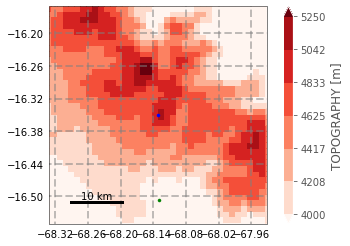

In [100]:
from cartopy import crs
# _da1 = _da.sum([co.TIME,co.ZM])
_da1 = _da[co.TOPO]
f,ax = splot(subplot_kw={'projection':crs.PlateCarree()})
_da1.plot.pcolormesh(ax=ax,cmap=plt.get_cmap('Reds'),robust=True,vmin=4e3,vmax=5250,levels=7);

ax.set_title('');
ax.set_xlim((co.CHC_LON-.2,co.CHC_LON+.2))
ax.set_ylim((co.CHC_LAT-.2,co.CHC_LAT+.2))
# ax.set_yticks([co.CHC_LAT], crs=crs.PlateCarree())
gl = ax.gridlines(crs=crs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
fa.add_chc_lpb(ax)
ucp.scale_bar(ax,(.1,.1),10)



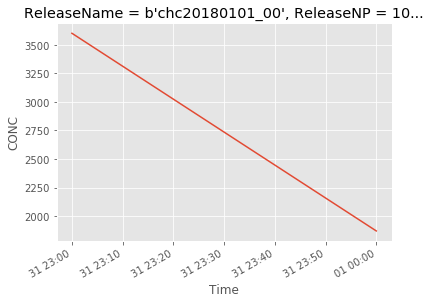

In [8]:

_da.sum(fa.get_dims_complement(_da,co.TIME)).plot()

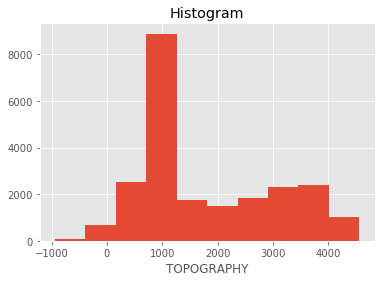

In [39]:
i7 = (5000-_da[co.TOPO])
i7.plot.hist();
i7.name='i7'

In [44]:
ZSL ='ZSL'

In [92]:
zr = np.arange(0,1e4,1e2)
zr = xr.DataArray(zr,coords=[(ZSL,zr)])

In [93]:
zr[ZSL]=zr[ZSL].assign_attrs(units='masl')

In [94]:
_zr = (zr-_da[co.TOPO])

In [95]:
_int=_da.interp(**{co.ZM:_zr,co.VLAT:i7[co.VLAT],co.VLONG:i7[co.VLONG]})

In [96]:
_int.sum().load().item()

18302.453125

In [97]:
_da.sum().load().item()

5470.19921875

In [98]:
_int2 = _int.where(_zr>0)

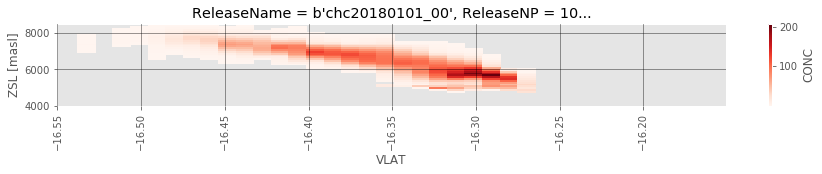

In [108]:
_is = _int2.sum([co.VLONG,co.TIME])
_is = _is.where(_is>0)
res = _is.plot(cmap=plt.get_cmap('Reds'),figsize=(15,1.5))
ax=plt.gca()
ax.set_xlim((co.CHC_LAT-.2,co.CHC_LAT+.2))
ax.set_ylim((4e3,8.5e3))
ax.tick_params(axis='x', rotation=90)
ax.grid(color='k',alpha=.5)
ax.set_axisbelow(False)

In [ ]:
path_wrf = '2018-01-01'